## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

## Loading the dataset and information about the dataset

In [2]:
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Exploratory Data Analysis(EDA)

## Survival Count

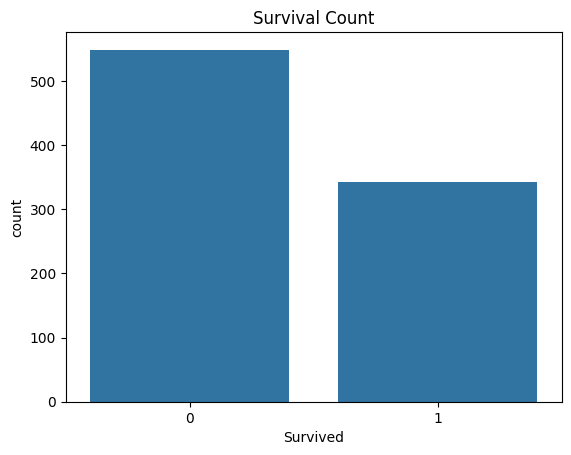

In [7]:
sns.countplot(x='Survived',data=df)
plt.title("Survival Count")
plt.show()

## Survival Sex wise

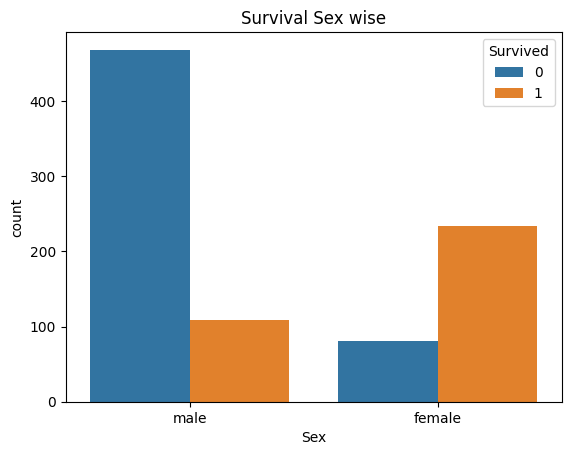

In [8]:
sns.countplot(x='Sex',hue='Survived',data=df)
plt.title("Survival Sex wise")
plt.show()

## Survival by Pclass

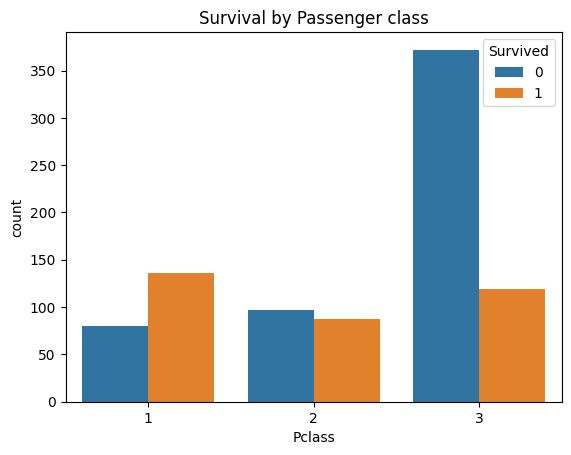

In [9]:
sns.countplot(x='Pclass',hue='Survived',data=df)
plt.title("Survival by Passenger class")
plt.show()

## Age Distribution

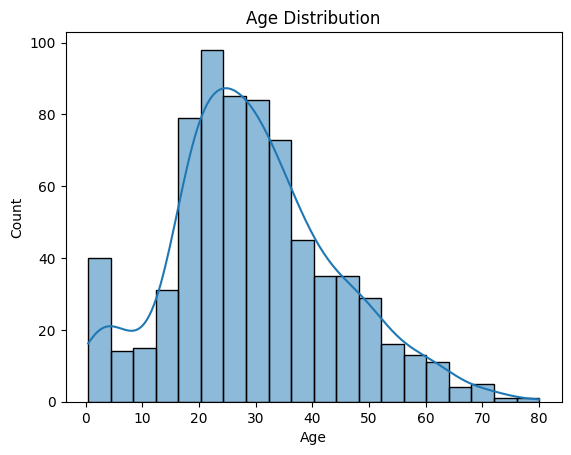

In [10]:
sns.histplot(df['Age'],kde=True)
plt.title("Age Distribution")
plt.show()

## Fare vs Survival

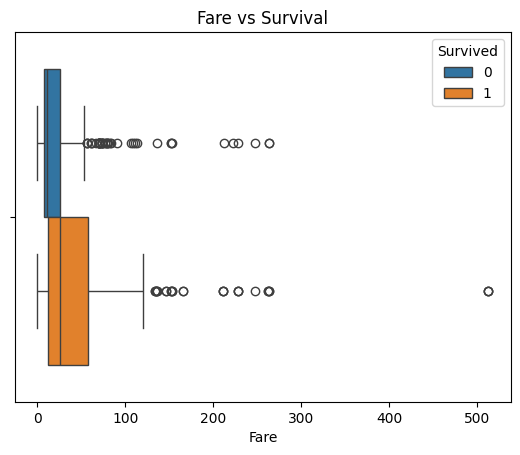

In [11]:
sns.boxplot(x='Fare',hue='Survived',data=df)
plt.title('Fare vs Survival')
plt.show()

## Data Cleaning and Preprocessing

In [12]:
df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)

df["Age"] = df["Age"].fillna(df["Age"].median())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

df["Sex"] = df["Sex"].map({"male": 0, "female": 1})

df["Embarked"] = df["Embarked"].map({"S": 0, "C": 1, "Q": 2})


In [13]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


## Train and Test Split

In [14]:
X = df.drop('Survived',axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
print("X_train ",X_train.shape)
print("X_test ",X_test.shape)
print("y_train ",y_train.shape)
print("y_test ",y_test.shape)

X_train  (712, 7)
X_test  (179, 7)
y_train  (712,)
y_test  (179,)


## Train with Random Forest Algorithm

In [16]:
rf = RandomForestClassifier(
    n_estimators=800,
    max_depth=None,
    min_samples_split=4,
    min_samples_leaf=2,
    random_state=42,
    criterion = 'gini'
)

rf.fit(X_train, y_train)


RandomForestClassifier(min_samples_leaf=2, min_samples_split=4,
                       n_estimators=800, random_state=42)

## Predictions and Evaluation Metrics

In [17]:
y_pred = rf.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred)*100)

Accuracy:  84.35754189944134


In [18]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[95 10]
 [18 56]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       105
           1       0.85      0.76      0.80        74

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.84       179
weighted avg       0.84      0.84      0.84       179



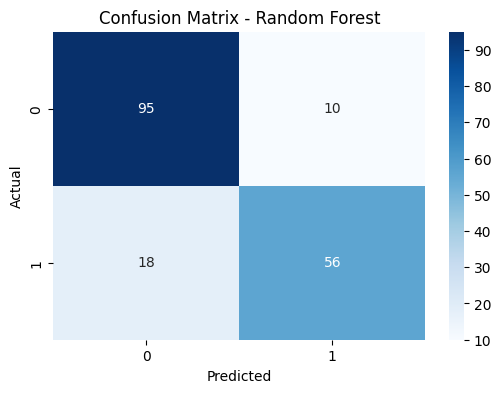

In [19]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Train with Random Forest using another crtiteria name for criterion parameter

In [20]:
rf2 = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    criterion = 'entropy'
)

rf2.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', random_state=42)

In [21]:
y_pred = rf.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred)*100)

Accuracy:  84.35754189944134


In [22]:
import joblib

joblib.dump(rf, "titanic_random_forest_model.pkl")
joblib.dump(rf2, "titanic_random_forest_model2.pkl")
print("Models saved successfully")

Models saved successfully
